## V01 Lebensdauer kosmischer Myonen

In [2]:
%config InlineBackend.figure_formats = ['svg']

from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df 
import scipy.constants as const
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

#### Delay

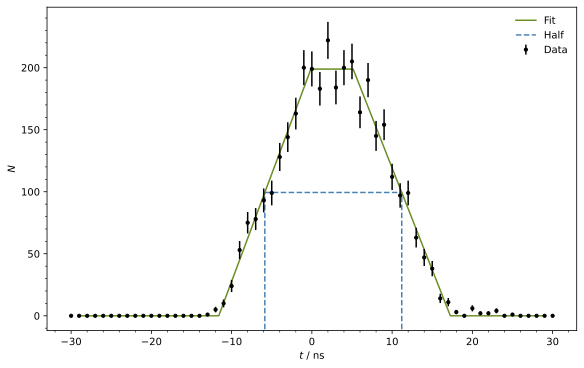

a = 17.3+/-0.8 1/ns
b = -11.60+/-0.29 ns
c = -0.12+/-0.35 ns
d = 5.1+/-0.4 ns
e = 17.26+/-0.28 ns

NN = 199+/-12

DT = 5.3+/-0.5 ns

t1 = -5.86+/-0.23 ns
t2 = 11.20+/-0.23 ns

dt = 17.06+/-0.32 ns

T = 11.79+/-0.32 ns

opt = 2.51+/-0.25 ns


In [3]:
t, N = np.genfromtxt('data/delay.txt', unpack=True)

def _plat(t, a, b, c, d, e):
    if t < b:
        return 0.0
    elif t < c:
        return a * (t - b)
    elif t < d:
        return a * (c - b)
    elif t < e:
        return a * (c - b) / (d - e) * (t - d) + a * (c - b)
    else:
        return 0.0

def plat(t, a, b, c, d, e):
    return np.vectorize(_plat)(t, a, b, c, d, e)

par, cov = fit(plat, t, N, p0=[20, -15, -3, 12, 23])
err = np.sqrt(np.diag(cov))

aa, bb, cc, dd, ee = uar(par, err)

NN = aa * (cc - bb)

DT = dd - cc

t1 = (cc + bb) / 2
t2 = (ee + dd) / 2
dt = t2 - t1

TT = dt - DT

opt = (dd + cc) / 2

tt = np.linspace(-29, 29, 1000)

plt.plot(tt, plat(tt, *par), c='olivedrab', label='Fit', zorder=10)
plt.errorbar(t, N, yerr=np.sqrt(N), fmt='k.', ms=6.42, label='Data', zorder=100)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([t1.n, t1.n], [-1e12, plat(t1.n, *par)], '--', c='steelblue')
plt.plot([t2.n, t2.n], [-1e12, plat(t2.n, *par)], '--', c='steelblue')
plt.plot([t1.n, t2.n], [plat(t1.n, *par), plat(t2.n, *par)], '--', c='steelblue', label='Half')

plt.xlabel(r'$t$ / ns')
plt.ylabel(r'$N$')

plt.legend()

plt.savefig('build/delay.pdf')
plt.show()
plt.close()

print(f'a = {aa} 1/ns')
print(f'b = {bb} ns')
print(f'c = {cc} ns')
print(f'd = {dd} ns')
print(f'e = {ee} ns')
print('')
print(f'NN = {NN}')
print('')
print(f'DT = {DT} ns')
print('')
print(f't1 = {t1} ns')
print(f't2 = {t2} ns')
print('')
print(f'dt = {dt} ns')
print('')
print(f'T = {TT} ns')
print('')
print(f'opt = {opt} ns')

with open('build/aa.tex', 'w') as f:
    f.write(f'\\qty{{{aa.n:.1f}+-{aa.s:.1f}}}{{\\per\\nano\\second}}')
with open('build/bb.tex', 'w') as f:
    f.write(f'\\qty{{{bb.n:.1f}+-{bb.s:.1f}}}{{\\nano\\second}}')
with open('build/cc.tex', 'w') as f:
    f.write(f'\\qty{{{cc.n:.1f}+-{cc.s:.1f}}}{{\\nano\\second}}')
with open('build/dd.tex', 'w') as f:
    f.write(f'\\qty{{{dd.n:.1f}+-{dd.s:.1f}}}{{\\nano\\second}}')
with open('build/ee.tex', 'w') as f:
    f.write(f'\\qty{{{ee.n:.1f}+-{ee.s:.1f}}}{{\\nano\\second}}')

with open('build/nn.tex', 'w') as f:
    f.write(f'\\num{{{NN.n:.0f}+-{NN.s:.0f}}}')

with open('build/dt.tex', 'w') as f:
    f.write(f'\\qty{{{DT.n:.1f}+-{DT.s:.1f}}}{{\\nano\\second}}')

with open('build/t1.tex', 'w') as f:
    f.write(f'\\qty{{{t1.n:.1f}+-{t1.s:.1f}}}{{\\nano\\second}}')
with open('build/t2.tex', 'w') as f:
    f.write(f'\\qty{{{t2.n:.1f}+-{t2.s:.1f}}}{{\\nano\\second}}')

with open('build/ddtt.tex', 'w') as f:
    f.write(f'\\qty{{{dt.n:.1f}+-{dt.s:.1f}}}{{\\nano\\second}}')

with open('build/t.tex', 'w') as f:
    f.write(f'\\qty{{{TT.n:.1f}+-{TT.s:.1f}}}{{\\nano\\second}}')

with open('build/opt.tex', 'w') as f:
    f.write(f'\\qty{{{opt.n:.1f}+-{opt.s:.1f}}}{{\\nano\\second}}')

table_header = r'''    \begin{tabular}{S[table-format=2.0] S[table-format=3.0]}
        \toprule
        {$t \mathbin{/} \unit{\nano\second}$} & {$N$} \\
        \midrule
'''
table_footer = r'''        \bottomrule
    \end{tabular}
'''
row_template = r'        {0:3.0f} & {1:3.0f} \\'

with open('build/delay.tex', 'w') as f:
    f.write(table_header)
    for row in zip(t, N):
        f.write(row_template.format(*row))
        f.write('\n')
    f.write(table_footer)

#### Calibration

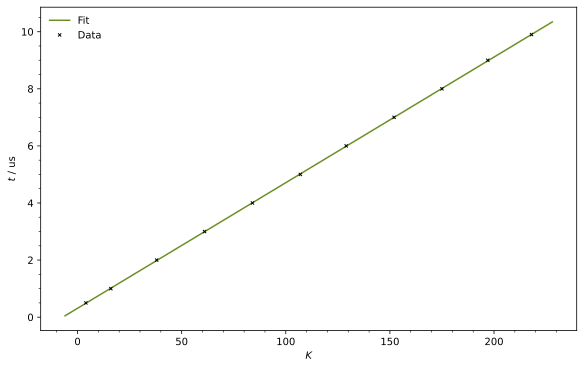

a = 0.04400+/-0.00006 us
b = 0.313+/-0.008 us


In [4]:
K, t = np.genfromtxt('data/test/calibration.txt', unpack=True)

par, cov = np.polyfit(K, t, deg=1, cov=True)
err = np.sqrt(np.diag(cov))
a, b = uar(par, err)

KK = np.linspace(K[0] - 10, K[-1] + 10, 2)

plt.plot(KK, a.n * KK + b.n, c='olivedrab', label='Fit')
plt.plot(K, t, 'kx', ms=3.21, label='Data')

plt.xlabel(r'$K$')
plt.ylabel(r'$t$ / us')

plt.legend()

plt.savefig('build/calibration.pdf')
plt.show()
plt.close()

print(f'a = {a} us')
print(f'b = {b} us')

with open('build/a.tex', 'w') as f:
    f.write(f'\\qty{{{a.n:.5f}+-{a.s:.5f}}}{{\\micro\\second}}')
with open('build/b.tex', 'w') as f:
    f.write(f'\\qty{{{b.n:.3f}+-{b.s:.3f}}}{{\\micro\\second}}')

table_header = r'''    \begin{tabular}{S[table-format=3.0] S[table-format=1.1]}
        \toprule
        {$K$} & {$t \mathbin{/} \unit{\micro\second}$} \\
        \midrule
'''
table_footer = r'''        \bottomrule
    \end{tabular}
'''
row_template = r'        {0:3.0f} & {1:1.1f} \\'

with open('build/calibration.tex', 'w') as f:
    f.write(table_header)
    for row in zip(K, t):
        f.write(row_template.format(*row))
        f.write('\n')
    f.write(table_footer)

#### Lifetime

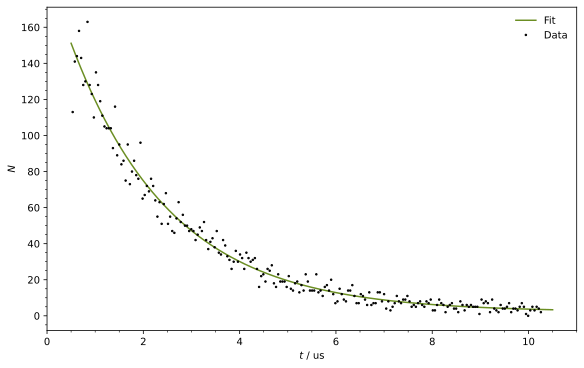

m = 2.1+/-0.8
n = 189.3+/-2.8

l = 0.478+/-0.012 1/us
t = 2.09+/-0.05 us


In [5]:
N = np.genfromtxt('data/test/lifetime.txt', unpack=True)
K = np.arange(1, len(N) + 1)

N = uar(N, np.sqrt(N))

t = a * K + b

k1 = 4
k2 = 226

def expon(t, l, m, n):
    return m + n * np.exp(-l * t)

par, cov = fit(expon, noms(t[k1:k2]), noms(N[k1:k2]), p0=[0.5, 2.5, 205])
err = np.sqrt(np.diag(cov))

l, m, n = uar(par, err)

tau = 1 / l

s = np.linspace(0.5, 10.5, 1000)

plt.plot(s, expon(s, *par), c='olivedrab', label='Fit')
plt.plot(noms(t[k1:k2]), noms(N[k1:k2]), 'k.', ms=3.21, label='Data')

plt.xlabel(r'$t$ / us')
plt.ylabel(r'$N$')

plt.legend()

plt.savefig('build/lifetime.pdf')
plt.show()
plt.close()

print(f'm = {m}')
print(f'n = {n}')
print('')
print(f'l = {l} 1/us')
print(f't = {tau} us')

with open('build/k1.tex', 'w') as f:
    f.write(f'\\num{{{k1:.0f}}}')
with open('build/k2.tex', 'w') as f:
    f.write(f'\\num{{{k2:.0f}}}')

with open('build/m.tex', 'w') as f:
    f.write(f'\\num{{{m.n:.1f}+-{m.s:.1f}}}')
with open('build/n.tex', 'w') as f:
    f.write(f'\\num{{{n.n:.1f}+-{n.s:.1f}}}')

with open('build/lam.tex', 'w') as f:
    f.write(f'\\qty{{{l.n:.2f}+-{l.s:.2f}}}{{\\per\\micro\\second}}')
with open('build/tau.tex', 'w') as f:
    f.write(f'\\qty{{{tau.n:.2f}+-{tau.s:.2f}}}{{\\micro\\second}}')

table_header = r'''    \sisetup{table-format=3.0}
    \begin{tabular}{S S S S S S S S S S S S S S S S}
        \toprule
        \multicolumn{16}{c}{$N$} \\
        \midrule
'''
table_footer = r'''        \bottomrule
    \end{tabular}
'''
row_template = '        {0:3.0f} & {1:3.0f} & {2:3.0f} & {3:3.0f} & \
{4:3.0f} & {5:3.0f} & {6:3.0f} & {7:3.0f} & {8:3.0f} & {9:3.0f} & \
{10:3.0f} & {11:3.0f} & {12:3.0f} & {13:3.0f} & {14:3.0f} & {15:3.0f} \\\\'

with open('build/lifetime.tex', 'w') as f:
    f.write(table_header)
    for row in zip(noms(N)[:int(len(K)*1/16)], noms(N)[int(len(K)*1/16):int(len(K)*2/16)],
                   noms(N)[int(len(K)*2/16):int(len(K)*3/16)], noms(N)[int(len(K)*3/16):int(len(K)*4/16)],
                   noms(N)[int(len(K)*4/16):int(len(K)*5/16)], noms(N)[int(len(K)*5/16):int(len(K)*6/16)],
                   noms(N)[int(len(K)*6/16):int(len(K)*7/16)], noms(N)[int(len(K)*7/16):int(len(K)*8/16)],
                   noms(N)[int(len(K)*8/16):int(len(K)*9/16)], noms(N)[int(len(K)*9/16):int(len(K)*10/16)],
                   noms(N)[int(len(K)*10/16):int(len(K)*11/16)], noms(N)[int(len(K)*11/16):int(len(K)*12/16)],
                   noms(N)[int(len(K)*12/16):int(len(K)*13/16)], noms(N)[int(len(K)*13/16):int(len(K)*14/16)],
                   noms(N)[int(len(K)*14/16):int(len(K)*15/16)], noms(N)[int(len(K)*15/16):]):
        f.write(row_template.format(*row))
        f.write('\n')
    f.write(table_footer)

#### Background

In [6]:
Tsuch = 10e-6
Tmess = 158234
Nstart = 4509112
Nstopp = 17526

Nerw = Nstart * Tsuch / Tmess

P = Nerw * np.exp(-Nerw)

O = P * Nstart
M = O / len(K)

print('')
print(f'P = {P * 1e2:.4f} %')
print('')
print(f'O = {O:.0f}')
print('')
print(f'M = {M:.1f}')
print('')

with open('build/tsuch.tex', 'w') as f:
    f.write(f'\\qty{{{Tsuch * 1e6:.0f}}}{{\\micro\\second}}')
with open('build/tmess.tex', 'w') as f:
    f.write(f'\\qty{{{Tmess:.0f}}}{{\\second}}')
with open('build/nstart.tex', 'w') as f:
    f.write(f'\\num{{{Nstart:.0f}}}')
with open('build/nstopp.tex', 'w') as f:
    f.write(f'\\num{{{Nstopp:.0f}}}')

with open('build/nerw.tex', 'w') as f:
    f.write(f'\\num{{{Nerw:.6f}}}')

with open('build/pp.tex', 'w') as f:
    f.write(f'\\qty{{{P * 1e2:.4f}}}{{\\percent}}')
with open('build/oo.tex', 'w') as f:
    f.write(f'\\num{{{O:.0f}}}')
with open('build/mm.tex', 'w') as f:
    f.write(f'\\num{{{M:.1f}}}')

with open('build/len.tex', 'w') as f:
    f.write(f'\\num{{{len(K):.0f}}}')


P = 0.0285 %

O = 1285

M = 2.5

